In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Data manipulation and analysis
import pandas as pd
import numpy as np

# Natural Language Processing
import re
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# Word Embeddings
from gensim.models import Word2Vec

# Deep Learning Models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Utility
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import StratifiedKFold
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as imbalancedPipeline

# Install necessary packages
!pip install pandas numpy nltk scikit-learn gensim tensorflow keras imbalanced-learn


In [ ]:
Dataset_PATH="/content/drive/MyDrive/AI Lab/AI Lab Final/spam.csv"

In [ ]:
df = pd.read_csv(Dataset_PATH)

In [ ]:
df.head(10)

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


# ***EDA: Exploratory Data Analysis***

In [ ]:
df.columns

Index(['Category', 'Message'], dtype='object')

In [ ]:
df['Category'].value_counts()

ham     4825
spam     747
Name: Category, dtype: int64

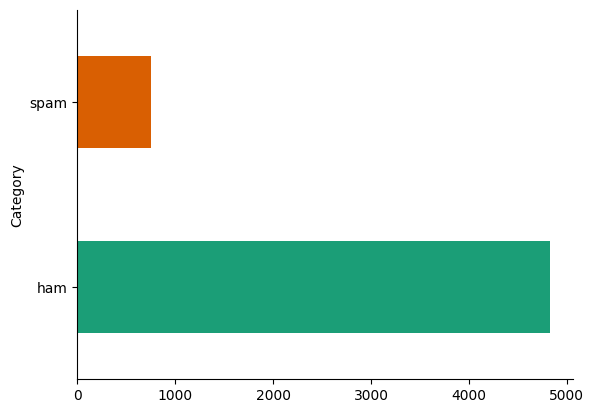

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('Category').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
df.info()  #Let's check the data types of the attributes in our data and whether they are null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [ ]:
df.describe()  #Let's check the data types of the attributes in our data and whether they are null values

,Category,Message
count,5572,5572
unique,2,5157
top,ham,"Sorry, I'll call later"
freq,4825,30


# ***Data Preprocessing***

In [ ]:
# Data preprocessing
# Convert the 'Category' column to numerical labels (0 for ham, 1 for spam)
df['Category'] = df['Category'].map({'ham': 0, 'spam': 1})

# ***Splitting***

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['Message'], df['Category'], test_size=0.2, random_state=42)

In [ ]:
# Text preprocessing and feature extraction using TF-IDF
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# ***Data Balancing Using Smote***

In [ ]:
# Balancing the data using SMOTE
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_tfidf, y_train)


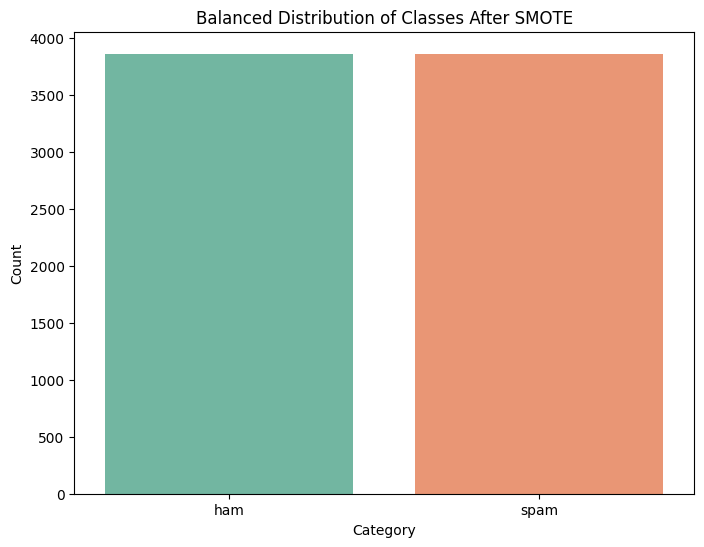

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Map numerical labels back to categories for better visualization
class_labels = {0: 'ham', 1: 'spam'}
y_train_balanced_labels = y_train_balanced.map(class_labels)

# Plot the distribution of the balanced data after SMOTE
plt.figure(figsize=(8, 6))
sns.countplot(x=y_train_balanced_labels, palette='Set2', order=['ham', 'spam'])
plt.title('Balanced Distribution of Classes After SMOTE')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()


In [ ]:
# Train a Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train_balanced, y_train_balanced)

MultinomialNB()

In [ ]:
# Make predictions
y_pred = nb_classifier.predict(X_test_tfidf)

In [ ]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(classification_rep)

Accuracy: 0.97
Confusion Matrix:
[[942  24]
 [  5 144]]
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.98       966
           1       0.86      0.97      0.91       149

    accuracy                           0.97      1115
   macro avg       0.93      0.97      0.95      1115
weighted avg       0.98      0.97      0.97      1115



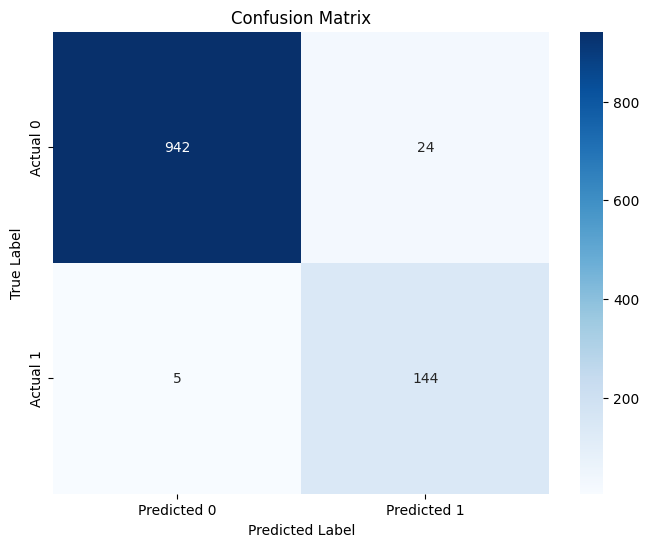

In [ ]:
# Visualize the confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [ ]:
# Import necessary libraries
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
import re

# Assuming 'new_email' is the new email you want to test
new_email = "'Congratulations! you have won a $1,000 Walmart gift card. Go to http://bit.ly/123456 to claim now.'"

# Text preprocessing for the new email
# You need to apply the same preprocessing steps you used for your training data
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove special characters and numbers
    text = re.sub(r'[^a-z\s]', '', text)
    # Remove stop words if necessary
    # You can use the same list of stop words you used during training

    return text

# Preprocess the new email
preprocessed_email = preprocess_text(new_email)

# Vectorize the preprocessed email using the same TF-IDF vectorizer from the training
new_email_tfidf = vectorizer.transform([preprocessed_email])

# Use the trained model to predict the category (ham or spam)
prediction = nb_classifier.predict(new_email_tfidf)

# Print the prediction
if prediction == 0:
    print("The email is classified as 'ham' (non-spam).")
else:
    print("The email is classified as 'spam'.")


The email is classified as 'spam'.


In [ ]:
# Import necessary libraries
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
import re

# Assuming 'new_email' is the new email you want to test
new_email = "As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune"

# Text preprocessing for the new email
# You need to apply the same preprocessing steps you used for your training data
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove special characters and numbers
    text = re.sub(r'[^a-z\s]', '', text)
    # Remove stop words if necessary
    # You can use the same list of stop words you used during training
    # Example: text = ' '.join([word for word in text.split() if word not in stop_words])
    return text

# Preprocess the new email
preprocessed_email = preprocess_text(new_email)

# Vectorize the preprocessed email using the same TF-IDF vectorizer from the training
new_email_tfidf = vectorizer.transform([preprocessed_email])

# Use the trained model to predict the category (ham or spam)
prediction = nb_classifier.predict(new_email_tfidf)

# Print the prediction
if prediction == 0:
    print("The email is classified as 'ham' (non-spam).")
else:
    print("The email is classified as 'spam'.")


The email is classified as 'ham' (non-spam).
